# Optical instruments lab

In this lab you will build some basic optical instruments and take images through them with your camera. For this lab you will need:

- The Arducam USB Camera
- Lenses and lens mounts
- Scotch tape or small objects to view
- Ruler or tape measure

In order to run the program you may need to install OpenCV which is a package for maipulating images. If you get a message that the package ```cv2``` can't be found, open up Anaconda Console and run the command:
```conda install -c conda-forge opencv```
You may need to restart the notebook before the changes take place. Let me know if you have problems with that install

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## The Camera

We will start by characterizing the camera. The following script will run the camera The camera view will open in a separate window. **You cannot close the window in the normal way. Trying to do so may crash python** - click on the window showing the video and press 'q' to close it. When you press q the function will return the last frame taken

In [3]:
def capture():
    
    cap = cv2.VideoCapture(0)
    #cap.set(cv2.CAP_PROP_EXPOSURE,20)
    frame = None
    while(True):
        # Capture frame-by-frame
        ret, frame = cap.read()

        # Display the resulting frame
        cv2.imshow('OpenCV Capture. Press q to exit',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
 
    # When everything done, release the capture
    cap.release()
    cv2.destroyAllWindows()
    return frame

Try taking a selfie. The following line runs the function and stores the image in variable ```frame```.

In [7]:
frame = capture()

**Important:** If you have another camera attached to your computer (e.g. a built in webcam) you may find the video is from that camera rather than the camera from the kit. If that is the case you may need to change the line in the function above:
```cap = cv2.VideoCapture(0)```  Try changing the number in the brackets to ```1```. This number is an index number for attached cameras.

You can display the image in the notebook using the following line

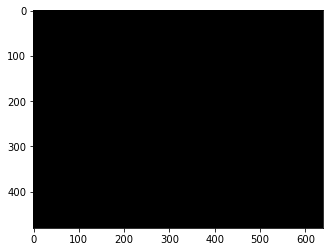

In [6]:
plt.imshow(frame)

### Camera Field of View

An important parameter for the camera is its field of view (FOV). This is straightforward to measure. Just take a ruler and position it so its scale fills the image on the camera. The ruler and camera form a triangle with the camera at the apex and the ruler as the oposite side. The apex angle is then the field of view. 

In [9]:
FOV = 1.09 rad

Since the camera is set to infinite focus, the CCD sensor is at the focal point of the lens. The sensor in the camera has a width of ... so given the chief rays from the edges of the image form the same angle behind the lens as in front the focal length of the the lens can be worked out from the FOV:

In [10]:
f_camera = 2.96 mm

The camera sensor has 640 pixels by 480 pixels. in the wider, horizontal direction, what are is the angle of view per pixel? This will be an important parameter in a  later experiment.

In [15]:
Cam_Dist = np.matrix([[1,2.96],[0,1]])


In [27]:
Cam_Lens = np.matrix([[1,0],[-1/2.96,1]])

In [28]:
CamMatrix = Cam_Dist*Cam_Lens

In [29]:
print(CamMatrix)

[[ 0.          2.96      ]
 [-0.33783784  1.        ]]


In [ ]:
radians_per_pixel = 0.00171 radians per pixel

## The Simple Magnifier

The simple magnifier is just a single lens. Let's try and magnify some objects via a lens. Mount a lens in front of the camera and place an object in front of it at the focal point of the magnifying lens. Determine the angular size of the object in the lens. Try for three different focal length lenses. Capture images through the 3 lenses and show them in the notebook as explained above. Make sure you label which focal length lens was used in each case.

As an object to use for the experiment. Take a piece of transparent scotch tape, stick it into some salt, sugar or other powder with visible grains, then stick the tape to one of the square slide holders from the kit. You can also try any other small fairly flat object. Note you may need to provide some bright illumination to see a clear image. One option is to set up the trinket behind the object (if it is transparent) and turn on its LED.

If the lens is too far away from the camera, you will be able to see it (probably out of focus) in the image. In this case the lens has become to the field stop of the system - it limits how much of the scene you can see. Make sure the lens is close enough that you can't see it in the image.


In [7]:
frame1 = capture()

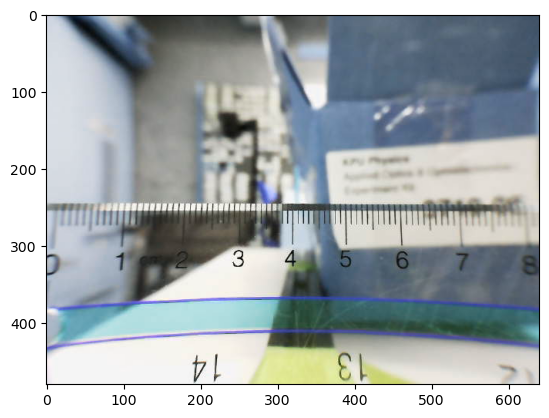

In [8]:
plt.imshow(frame1)

Magnifier 1: 75 mm  Lens

Angular magnification 1= 3.3

In [9]:

frame2 = capture()

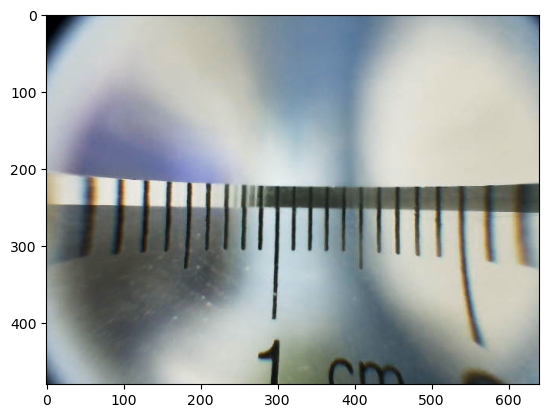

In [10]:
plt.imshow(frame2)

Magnification 2: 25 mm lens

Angular Magnification 2 = 9.7

In [63]:
Mag2_Dist = np.matrix([[1,25],[0,1]])

In [64]:
Mag2_Lens = np.matrix([[1,0],[-1/25,1]])

In [65]:
Mag2Matrix = Mag2_Lens*Mag2_Dist

In [66]:
print(Mag2Matrix)

[[ 1.   25.  ]
 [-0.04  0.  ]]



**Question**: The magnification is not affected by the distance between the magnifying lens and the camera. Why not?

# Telescope

A refracting astronomical telescope takes in parallel rays from distant objects and puts out parallel rays for the eye to receive. The output ray angles are higher thus increasing the aparent angular size of objects. The classic refractor has two lenses: a long focal length  _objective_ and a shorter focal length _eyepiece_. If the two lenses are focal length $f_o$ and $f_e$, separated by distance $L$  show that in order to produce required infinite object and image distances that $L=f_o + f_e$. What is the angular magnification in terms of the focal lengths?

Anglular magnification = \$\frac{f_o}{f_e}\$

## Build the telescope

Using the lenses you have available, build 3 different telescopes and measure their field of view just as you did for the camera alond. Check the angular magnifications are as expected from your calculations above. You will probably see the objective lens in the final image. The FOV should be measured only for the image seen _through both lenses_.  

Show captured images through your telescopes in the notebook. Indicate which lenses you used for objective and eyepiece

**Bonus:** Work out how big the objective lens would have to be so that you can't see it in the image.

Telescope Image 1: Using \$fe\$ = 25mm and \$fo\$ = 35mm

Anglular Mag = 1.4

In [13]:
frame3 = capture()

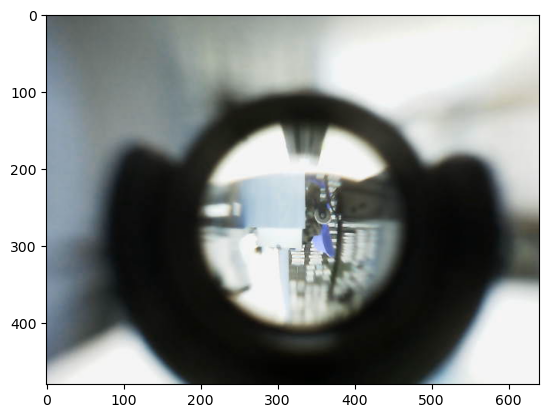

In [14]:
plt.imshow(frame3)

Telescope Image 2: Using \$fe\$ = 35mm and \$fo\$ = 35mm

Anglular Mag = 1

In [15]:
frame4 = capture()

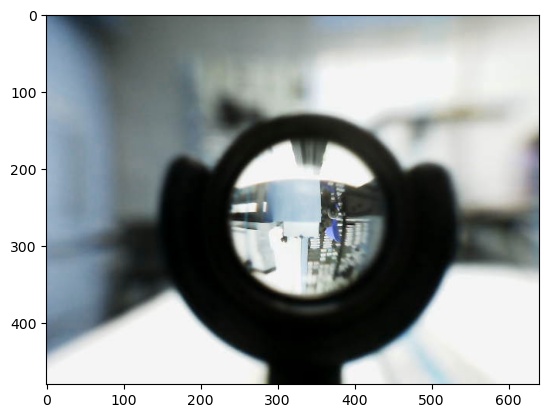

In [16]:
plt.imshow(frame4)

Telescope Image 3:Using \$fe\$ = 35mm and \$fo\$ = 50mm

Anglular Mag = 1.43

In [19]:
frame6 = capture()

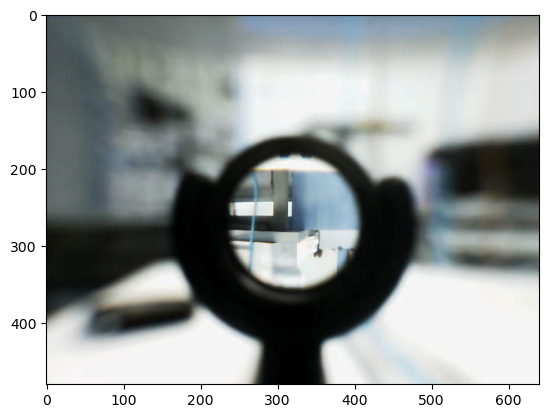

In [18]:
plt.imshow(frame5)

$L = s_{i1} + s_{o2}$

$\frac{1}{f_1} = \frac{1}{s_{o1}}+\frac{1}{s_{i1}}$

$\frac{1}{f_1} = \frac{1}{s_{o1}}+\frac{1}{\infty}$

$\frac{1}{f_1} = \frac{1}{s_{o1}}$

$f_1 = s_{o1}$

$\frac{1}{f_2} = \frac{1}{s_{o2}}+\frac{1}{s_{i2}}$

$\frac{1}{f_2} = \frac{1}{\infty}+\frac{1}{s_{i2}}$

$\frac{1}{f_2} = \frac{1}{s_{i2}}$

$f_2 = s_{o2}$

Then

$L = f_1 + f_2$


In [51]:
Tele_Fo = np.matrix([[1,0],[-1/50,1]])

In [53]:
Tele_Dist1 = np.matrix([[1,85],[0,1]])

In [54]:
Tele_Fe = np.matrix([[1,0],[-1/35,1]])

In [55]:
TeleMatrix = Tele_Fe*Tele_Dist1*Tele_Fo

In [56]:
print(TeleMatrix)

[[-7.00000000e-01  8.50000000e+01]
 [-3.46944695e-18 -1.42857143e+00]]


In [67]:
Tele_Dist2 = np.matrix([[1,35],[0,1]])

In [70]:
TeleMatrixWithCam = CamMatrix*Tele_Dist2*TeleMatrix

In [71]:
print(TeleMatrixWithCam)

[[-1.02695630e-17 -4.22857143e+00]
 [ 2.36486486e-01 -1.32528958e+01]]




# Microscope

In the telescope, the eyepiece is essentially a simple magnifier viewing the real image of the infintely far away object formed by the objective. In a microscope the eyepiece again looks at the image formed by the objective, but this time the objective is forming a magnified real image of a small object close to the objective.

To build a microscope, set up your camera with a simple magnifier at the very end of the rail. Use a second lens with a short focal length and set it so that it will form an image at the focal point of the magnifier lens. The image formed by the objective should be real and magnified.

Again work out the total system matrix and show your captured images. For the microscope you will definitely need your object to be well illuminated.


In [20]:
frame6 = capture()

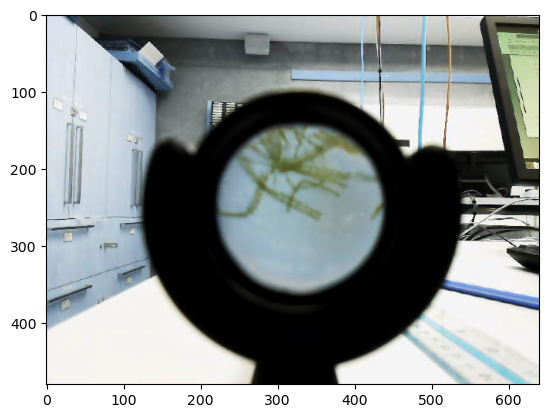

In [21]:
plt.imshow(frame6)

Microscope Image: Using \$fe\$ = 50mm and \$fo\$ = 35mm

$s_i=\frac{f_o \times s_o}{s_o - f_o} = \frac{35 \times 40}{40 - 35} = 280$

$M = -\frac{s_i}{s_o} = \frac{280}{40} = 5.6$

In [25]:
Micro_Dist1 = np.matrix([[1,40],[0,1]])

In [42]:
Micro_Fo = np.matrix([[1,0],[-1/35,1]])

In [30]:
Micro_Dist2 = np.matrix([[1,330],[0,1]])

In [43]:
Micro_Fe = np.matrix([[1,0],[-1/50,1]])

In [32]:
Micro_Dist3 = np.matrix([[1,50],[0,1]])

In [44]:
MicroMatrix = Micro_Fe*Micro_Dist2*Micro_Fo*Micro_Dist1

In [45]:
print(MicroMatrix)

[[-8.42857143 -7.14285714]
 [ 0.14        0.        ]]


In [46]:
MicroMatrixWithCam = CamMatrix*Micro_Dist3*MicroMatrix

In [47]:
print(MicroMatrixWithCam)

[[0.4144     0.        ]
 [0.62262548 2.41312741]]
